In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\MBA\Projects\\loan prediction_AV\\loan_train.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Checking for null values
data.isnull().sum()
#Alternate way to do same thing
#data.apply(lambda x:x.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Loan ID column is not required.We can delete it
del data['Loan_ID']

In [7]:
#Checking data types and unique values in column
data.dtypes
data.apply(lambda x:len(x.unique()))


Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

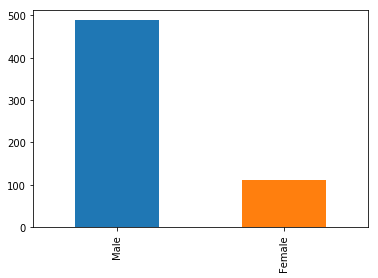

In [12]:
#Explorartory Data Analysis
data['Gender'].value_counts().plot(kind='bar')
gb_gender = data.groupby(by=["Gender", "Loan_Status"]).size

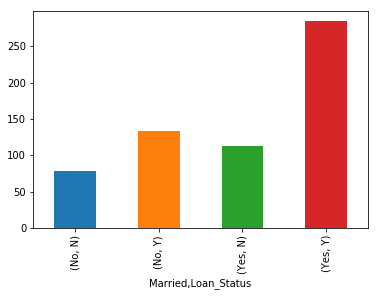

In [13]:
gb_married=data.groupby(["Married","Loan_Status"]).size()
married_plot=gb_married.plot(kind="bar")

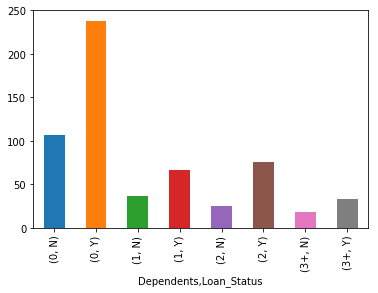

In [14]:
gb_dependents=data.groupby(["Dependents","Loan_Status"]).size()
dependant_plot=gb_dependents.plot(kind="bar")

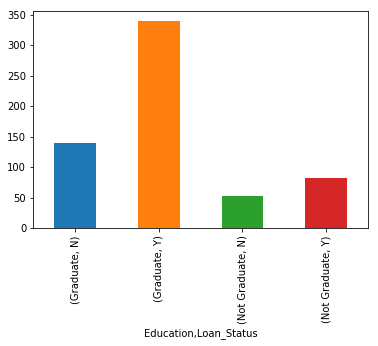

In [15]:
gb_education=data.groupby(["Education","Loan_Status"]).size()
edu_plot=gb_education.plot(kind="bar")

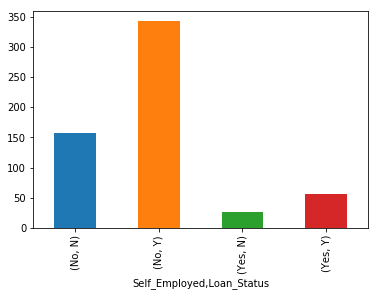

In [16]:
gb_employed=data.groupby(["Self_Employed","Loan_Status"]).size()
employed_plot=gb_employed.plot(kind="bar")

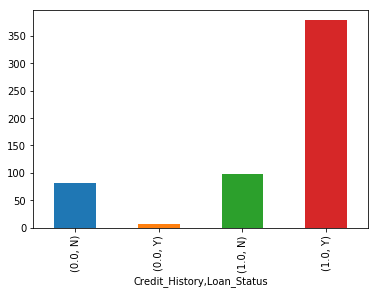

In [17]:
gb_credit=data.groupby(["Credit_History","Loan_Status"]).size()
credit_plot=gb_credit.plot(kind="bar")


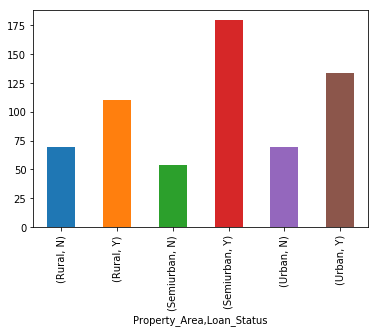

In [18]:
gb_property=data.groupby(["Property_Area","Loan_Status"]).size()
property_plot=gb_property.plot(kind="bar")

In [19]:
#Missing Value treatement

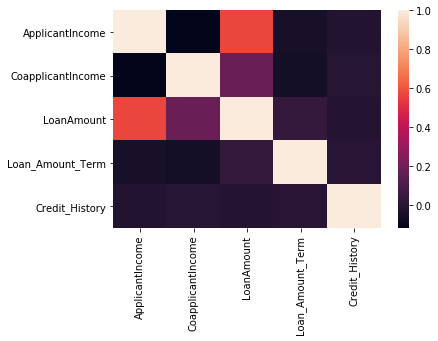

In [20]:
#First we will see is there any significant correlation between the any two features
corr=data.corr()
sns.heatmap(corr)


In [21]:
#We will find out numeric values of significant correlations
data2=data
c = data2.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so1=so[so>0.5]
so1

LoanAmount         ApplicantIncome      0.570909
ApplicantIncome    LoanAmount           0.570909
                   ApplicantIncome      1.000000
LoanAmount         LoanAmount           1.000000
CoapplicantIncome  CoapplicantIncome    1.000000
Loan_Amount_Term   Loan_Amount_Term     1.000000
Credit_History     Credit_History       1.000000
dtype: float64

In [22]:
#as there is .6 correlation between loan amount and applicant income-replace na values of loan amount 
#with random value between 100-150 if applicant income for corresponding row is below 10000,otherwise 
#with 200
mask=(data.LoanAmount.isnull()) & (data.ApplicantIncome<10000)
data.loc[mask,'LoanAmount']=data.loc[mask,'LoanAmount'].apply(lambda x:np.random.randint(120,150))
data.apply(lambda x:x.isnull().sum())
mask2=(data.LoanAmount.isnull()) & (data.ApplicantIncome>10000)
data.loc[mask2,'LoanAmount']=data.loc[mask2,'LoanAmount'].apply(lambda x:np.random.randint(180,220))


In [23]:
#also we can see their is significant correlation between credit history and loan status
mask3=(data.Credit_History.isnull()) & (data.Loan_Status=='Y')
data.loc[mask3,'Credit_History']=data.loc[mask3,'Credit_History'].apply(lambda x:1)
mask4=(data.Credit_History.isnull()) & (data.Loan_Status=='N')
data.loc[mask4,'Credit_History']=data.loc[mask4,'Credit_History'].apply(lambda x:0)


In [24]:
#for loan amount term,we can directly replace NA with 360
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna('360')


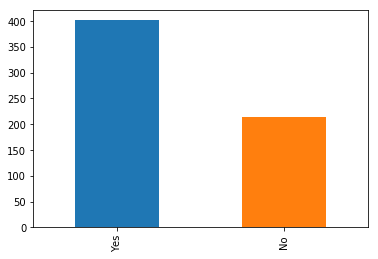

In [26]:
#for married
data['Married'].value_counts().plot(kind='bar')
# As most of the entries are 'Yes',we'll replace NA's with 'Yes'
data['Married']=data['Married'].fillna('Yes')
# and same with gender
data['Gender']=data['Gender'].fillna('Male')

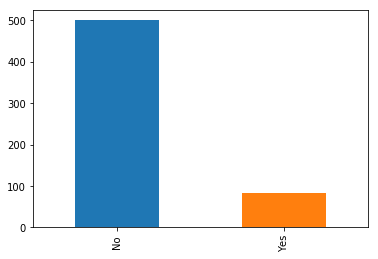

In [27]:
#for self employed
data['Self_Employed'].value_counts().plot(kind='bar')
data['Self_Employed']=data['Self_Employed'].fillna('No')

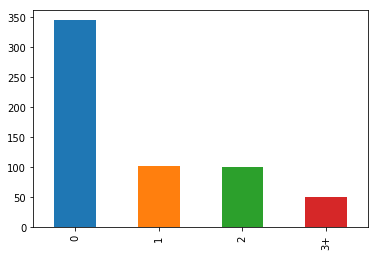

In [28]:
#for dependents
data.groupby(['Loan_Status','Dependents']).size()
data['Dependents'].value_counts().plot(kind='bar')
data.groupby(['Education','Dependents']).size()
mask6=(data.Dependents.isnull()) & (data.Education=='Graduate')
data.loc[mask6,'Dependents']=data.loc[mask6,'Dependents'].apply(lambda x:'0')
data.apply(lambda x:x.isnull().sum())
data['Dependents']=data['Dependents'].fillna('2')


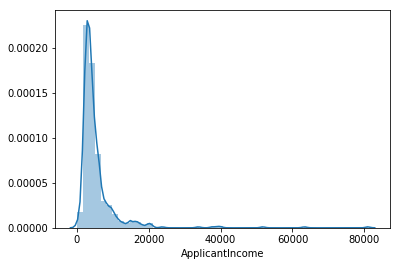

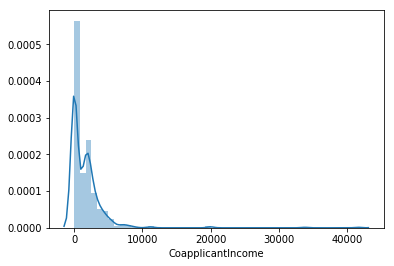

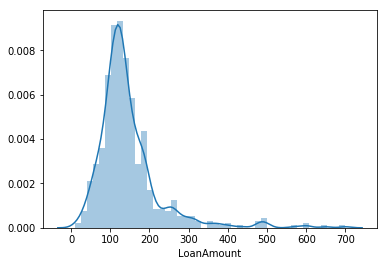

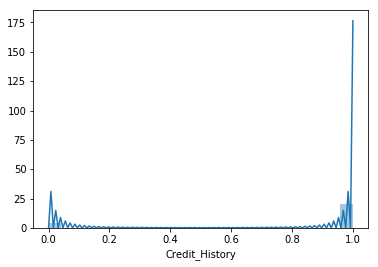

In [29]:
#now we'll plot histograms of all numeric column to see the distribution and will try to make 
#it more close to normal


hist_all=data.select_dtypes(exclude=['object'])
for i, col in enumerate(hist_all.columns):
    plt.figure(i)
    sns.distplot(hist_all[col])


In [30]:
#convert loan term to numeric dtype from object,otherwise there will be dummies for it
data['Loan_Amount_Term']=pd.to_numeric(data['Loan_Amount_Term'],errors='coerce')

In [31]:
#Check for NA again
data.apply(lambda x:x.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
#Converting categorical data into dummies to get more accurate results
data2=pd.get_dummies(data.iloc[:,:-1])
data2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,132.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [33]:
# Dividing data into target and features
y=data.iloc[:,1].values
X=data2.values


In [34]:
# Dividing data into training data and test data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=22)

C:\Users\Sachin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 91.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

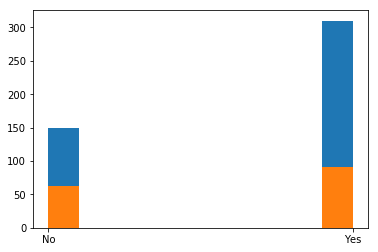

In [35]:
# Checking distribution of levels in target variable in test data and train data
#Sometimes data get distributed dispropotionaly in train and test part
train_dist=y_train.ravel()
plt.hist(train_dist)
test_dist=y_test.ravel()
plt.hist(test_dist)

In [36]:
# We will use logistic regression to predict 
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
compare=[[y_test,prd]]
score = reg.score(X_test, y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, prd)